<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/Data_curation%2Bsplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit # Order of installment was important now it should work
#!pip uninstall networkx==3.2
#!pip install mordred
#!pip uninstall numpy==1.26.4
!pip install scikit-learn


In [ ]:
#Import packages

import pandas as pd
import re
import numpy as np
import os
from google.colab import drive
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
import matplotlib.pyplot as plt
import math
RDLogger.DisableLog("rdApp.info")

from rdkit.Chem import Descriptors, rdMolDescriptors
#from mordred import Calculator, descriptors

In [ ]:
#RUN THIS CELL IF func.py CHANGES

#get functions from functions file (still have to move most of the functions there!)
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/df_dpph.csv

#from func import is_substruct_in, convert_smiles_series_to_fp_to_np_array, convert_smiles_series_to_fp_to_np_array_exception_handling
#why import functions one by one?
#could be executed alternatively by:
%run func.py



--2025-05-17 18:57:39--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py [following]
--2025-05-17 18:57:39--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6467 (6.3K) [text/plain]
Saving to: ‘func.py’

func.py             100%[===================>]   6.32K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-05-17 18:57:40 (65.0 MB/s) - ‘func.py’ sav

<Figure size 640x480 with 0 Axes>

#Landrum et al. inspired data curation (10.1021/acs.jcim.4c00049)

In [ ]:
#Read in the csv
df_dpph = pd.read_csv('df_dpph.csv')

In [ ]:
df_model_1 = df_dpph["canonical_Smiles"].value_counts().reset_index()
repeated_smiles = df_model_1[df_model_1["count"] > 1]["canonical_Smiles"]
df_model_1 = df_dpph[df_dpph["canonical_Smiles"].isin(repeated_smiles)]

df_model_1_grouped = df_model_1.groupby(["canonical_Smiles"])["value_nM"].mean()
df_model_1_grouped.head()

,value_nM
canonical_Smiles,
C/C=C/c1ccc2oc(-c3ccc(O)cc3O)cc2c1,22100.000000
C/C=C/c1ccc2oc(-c3ccc(O)cc3OC)cc2c1,36300.000000
C/C=C/c1ccc2oc(-c3ccc(OC)cc3O)cc2c1,24200.000000
CC(=O)N[C@@H](CS)C(=O)O,46966.666667
CC(C)(C)c1cc(O)ccc1O,47626.000000


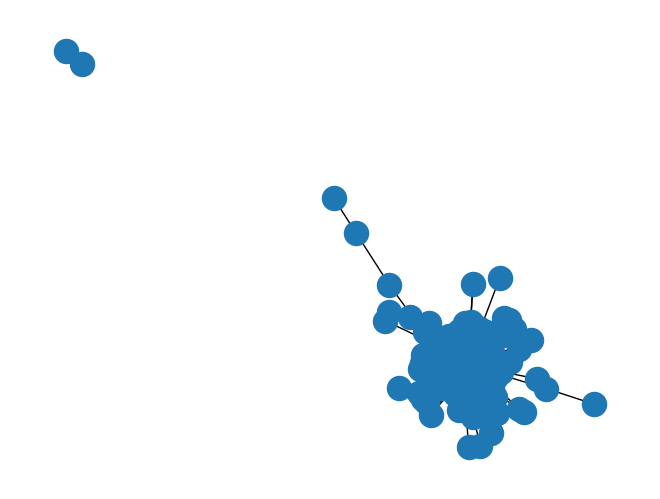

Final curated DataFrame has 3267 unique canonical_Smiles and 217 unique assay descriptions.


,Unnamed: 0,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,...,PPB Applicability MD,PPB Applicability MDpvalue,canonical_Smiles,activity_type,operator,activity_value,units,value_nM,pIC50,is_phenol
0,0,AOXMO00050,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,InChI=1S/C18H15NO3/c20-9-19-6-5-12-8-15-18(22-...,C18H15NO3,293.3,2.69,0,4,38.8,...,16.9487,0.000002,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,IC50,=,121400.0,nM,121400.0,3.915781,0
1,1,AOXMO00051,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,C6H8O6,176.1,-1.41,4,6,107.2,...,14.3277,0.048874,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,IC50,=,52100.0,nM,52100.0,4.283162,0
2,2,AOXMO00487,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H17N3O/c1-14-17(19-13-15-9-5-3-6-1...,C18H17N3O,291.4,3.24,0,4,39.3,...,11.4141,0.980298,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31260.0,nM,31260.0,4.505011,0
3,3,AOXMO00488,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H16ClN3O/c1-13-17(20-12-14-8-10-15...,C18H16ClN3O,325.8,3.89,0,4,39.3,...,12.4505,0.751763,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31680.0,nM,31680.0,4.499215,0
4,4,AOXMO00489,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C20H22N4O/c1-15-19(21-14-16-10-12-17(...,C20H22N4O,334.4,3.30,0,5,42.5,...,14.6459,0.021033,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,2430.0,nM,2430.0,5.614394,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,5182,AOXMO47445,O=C(OCCc1ccc(O)cc1)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-3-1-9(2-4-11)5-6-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,11.8268,0.933475,O=C(OCCc1ccc(O)cc1)c1cc(O)c(O)c(O)c1,IC50,=,7520.0,nM,7520.0,5.123782,1
3866,5183,AOXMO47446,O=C(OCCc1ccccc1O)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-4-2-1-3-9(11)5-6-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,12.0444,0.887349,O=C(OCCc1ccccc1O)c1cc(O)c(O)c(O)c1,IC50,=,8310.0,nM,8310.0,5.080399,1
3867,5184,AOXMO47447,O=C(OCCc1cccc(O)c1)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-3-1-2-9(6-11)4-5-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,13.0616,0.459216,O=C(OCCc1cccc(O)c1)c1cc(O)c(O)c(O)c1,IC50,=,7780.0,nM,7780.0,5.109020,1
3868,5185,AOXMO47448,Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(CCC[C@H](C)CCC[C...,InChI=1S/C29H50O2/c1-20(2)12-9-13-21(3)14-10-1...,C29H50O2,430.7,8.84,1,2,29.5,...,17.0697,0.000001,Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(CCC[C@H](C)CCC[C...,IC50,=,9890.0,nM,9890.0,5.004804,1


In [ ]:
import networkx as nx

def extract_connected_assays(df):
    """
    Extracts rows from the input dataframe (df_dpph) that have operator '='
    and belong to canonical_Smiles groups for which the compound was measured
    in at least two different assays (Assay Description) with pIC50 values that
    are in close agreement (absolute difference less than 0.3).

    Parameters:
      df (pd.DataFrame): Input dataframe with the following columns:
                         'operator', 'canonical_Smiles', 'pIC50',
                         'Assay Description', and 'DOI'.

    Returns:
      pd.DataFrame: A filtered dataframe containing only those rows from
                    assays that are connected via compatible pIC50 measurements.
    """
    # Work only on the rows where the operator is "=".
    df_eq = df[df['operator'] == '='].copy()
    connected_assays = set()
    # Use a set to gather indices of rows meeting the connection criterion.
    excluded_assays = set()
    rows_to_drop = set()


    assay_1 = []
    assay_2 = []
    Graph = nx.Graph()

    # Group the data by canonical_Smiles.
    for smile, group in df_eq.groupby('canonical_Smiles'):    #return value of groupby() is a single value (here a string) and a dataframe

        # Only consider groups measured in at least two different assay descriptions.
        assay_descs = group['Assay Description'].unique()
        if len(assay_descs) < 2:
            continue

        # Flag to check if at least one pair of rows (from different assays) meets the criterion.
        found_connection = False
        group_indices = group.index.tolist()
        if len(group_indices) < 2:
          break
        # Compare every unique pair from the group.
        for i in range(len(group_indices)):

            for j in range(i + 1, len(group_indices)):
                row_i = group.loc[group_indices[i]]
                row_j = group.loc[group_indices[j]]

                # Only consider pairs coming from different assay descriptions.
                if row_i['Assay Description'] != row_j['Assay Description']:
                  if row_i['DOI'] == row_j['DOI']: #if assays are from the same doi skip the loop
                    continue
                  if row_i["pIC50"]==row_j["pIC50"]:
                    rows_to_drop.update([row_i.name])
                    rows_to_drop.update([row_j.name])
                  if row_i["canonical_Smiles"] == row_j["canonical_Smiles"]:
                    diff = abs(row_i['pIC50'] - row_j['pIC50'])
                    #if diff > 3:  #including breaking conditon where assays differ by power of 3, yeah not really a good Idea in hindsight is removed
                      #break
                    if diff < 0.3:
                        #connected_indices.add(group_indices[i])
                        #connected_indices.add(group_indices[j])
                        edge_1 = row_i["Assay Description"]
                        edge_2 = row_j["Assay Description"]
                        Graph.add_edge(edge_1, edge_2)

    for edge in nx.connected_components(Graph):
      if len(edge) > 1: #only get assays which are connected to more than 1 other assay
          connected_assays.update(edge)
    largest_cc = max(nx.connected_components(Graph), key=len) #only return the largest graph not a small subgraph
    connected_assays.update(largest_cc)

    df_eq.drop(index=rows_to_drop, inplace=True)


    #connected_assays = [node for node, degree in Graph.degree() if degree > 2]
    # Return the subset of rows that are connected.
    return df_eq.loc[df_eq["Assay Description"].isin(connected_assays)].reset_index(drop=True), assay_1, assay_2, Graph


connected_df, assay_1, assay_2, Graph = extract_connected_assays(df_dpph)

# Now, connected_df contains all rows from assays that are connected
# via a canonical smile measured in at least two different assays with |ΔpIC50| < 0.3.
nx.draw_spring(Graph, with_labels=False)
plt.show()


# Now, report the number of unique canonical smiles and assay descriptions in the final dataframe.
num_smiles = connected_df['canonical_Smiles'].nunique()
num_assays = connected_df['Assay Description'].nunique()
print(f"Final curated DataFrame has {num_smiles} unique canonical_Smiles and {num_assays} unique assay descriptions.")

connected_df
# connected_df was manually saved once to github

In [ ]:
#check how many are phenolic
connected_df['Assay Description'].value_counts()
connected_df_unique_smiles = connected_df[["SMILES", "is_phenol"]].drop_duplicates().reset_index(drop=True)
phenolic_compounds = len(connected_df_unique_smiles[connected_df_unique_smiles['is_phenol'] == 1])

print(f"Phenolic compounds: {phenolic_compounds} left of total {len(connected_df_unique_smiles)}")

#printed names of assays to manually check the left-over descriptions.
#apparantly there are assays with different duration, ranging from 30-270 min.
#is it reasonable, that these assays are comparable? maybe due to saturation or so?

Phenolic compounds: 1954 left of total 3267


3267


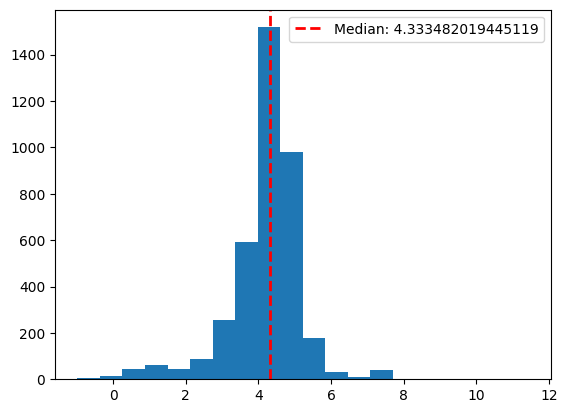

In [ ]:
connected_df_grouped = (
    connected_df
    .groupby('canonical_Smiles')
    .agg(
        pIC50_mean=('pIC50', 'mean'),
        pIC50_median=('pIC50', 'median'),
        pIC50_var=('pIC50', 'var'),
        is_phenol=('is_phenol', 'first')  # Keep first occurrence (all duplicates are identical)
    )
    .reset_index()  # Flatten the index
)

print(len(connected_df_grouped))
median = connected_df["pIC50"].median()

plt.hist(connected_df["pIC50"], bins = 20)
plt.axvline(x = median, color = 'red', linestyle = '--', linewidth = 2, label = f"Median: {median}")
plt.legend()

[np.float64(4.552841968657781), np.float64(4.443697499232713), np.float64(4.443697499232713), np.float64(4.2403321553103694), np.float64(4.442372511573174), np.float64(4.682981898951889), np.float64(4.682981898951889), np.float64(4.401395502994773), np.float64(4.6219656775426685), np.float64(4.646468440922238), np.float64(4.6217838502501225), np.float64(5.920818753952375), np.float64(3.505448875755968), np.float64(3.505448875755968), np.float64(3.505448875755968), np.float64(4.705533773838407), np.float64(4.705533773838407), np.float64(4.568636235841013), np.float64(4.516270100999976), np.float64(4.516270100999976), np.float64(4.516270100999976), np.float64(4.516270100999976), np.float64(4.516270100999976), np.float64(4.516270100999976), np.float64(5.214670164989233), np.float64(5.214670164989233), np.float64(5.214670164989233), np.float64(5.214670164989233), np.float64(5.214670164989233), np.float64(4.336299074610352), np.float64(4.336299074610352), np.float64(4.336299074610352), np.f

Text(0, 0.5, 'assay_2 [pIC50]')

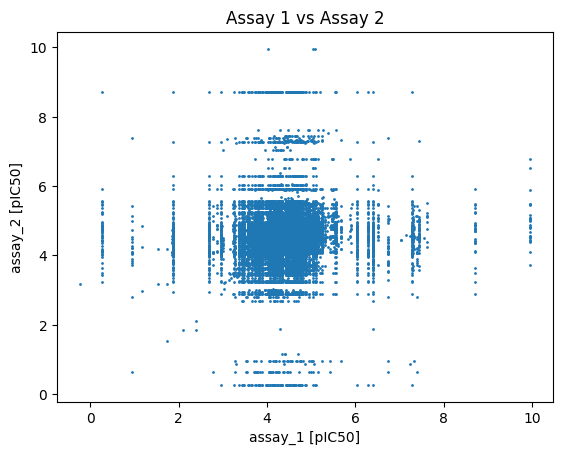

In [ ]:
assay_1 = []
assay_2 = []

for smiles, group in connected_df.groupby("canonical_Smiles"):
  group_indices = group.index.tolist()

  n = len(group_indices)


  for i in range(len(group_indices)):
        for j in range(i + 1, len(group_indices)):  # avoid self-pairs and duplicates
          row_i = connected_df.loc[group_indices[i]]
          row_j = connected_df.loc[group_indices[j]]
          if row_j['Assay Description'] != row_i['Assay Description']:
            #if np.abs(row_i["pIC50"] - row_j["pIC50"]) :
            assay_1.append(row_i['pIC50'])
            assay_2.append(row_j['pIC50'])


print(assay_1)
plt.scatter(assay_1, assay_2, s=1)
plt.title("Assay 1 vs Assay 2")
plt.xlabel("assay_1 [pIC50]")
plt.ylabel("assay_2 [pIC50]")

In [ ]:
outliers = connected_df[connected_df["pIC50"] < 2]
print(f"Number of outliers: {len(outliers['pIC50'])}")
variance = connected_df_grouped[('pIC50_var')].median()
print(f"Median variance of the pIC50 values: {variance}")

print(f"number of compounds with multiple values (i.e valid variance) which passed the connection test: {len(connected_df_grouped[('pIC50_var')].dropna())}")

Number of outliers: 162
Median variance of the pIC50 values: 0.058168379887412816
number of compounds with multiple values (i.e valid variance) which passed the connection test: 136


number of smiles which have a variance (i.e values which exist more than once): 136


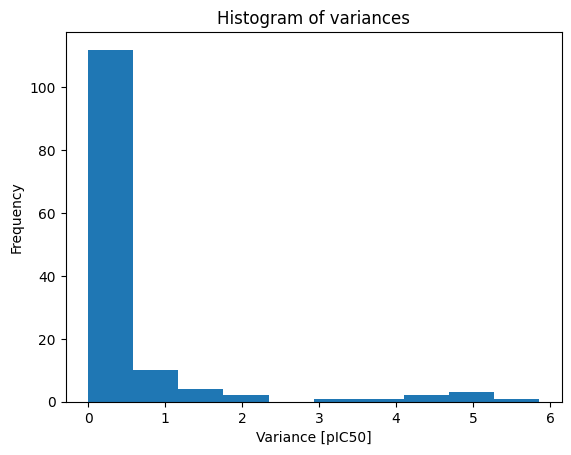

,index,pIC50_var
0,155,0.000001
1,225,0.036764
2,235,0.013424
3,293,0.251987
4,294,0.000003
...,...,...
131,3196,0.105737
132,3199,0.001855
133,3201,0.455289
134,3209,0.020167


In [ ]:
connected_df_grouped_with_multiple_values = connected_df_grouped[('pIC50_var')].dropna().reset_index()

valid_variances = connected_df_grouped_with_multiple_values[('pIC50_var')] #getting the variances which are not none and why are not of values with only
print(f"number of smiles which have a variance (i.e values which exist more than once): {len(valid_variances)}")
plt.hist(valid_variances)
plt.title("Histogram of variances")
plt.xlabel("Variance [pIC50]")
plt.ylabel("Frequency")
plt.show()

connected_df_grouped_with_multiple_values#.columns

#Minimal data curation

In [68]:
minimal_df = df_dpph[
    (df_dpph['operator'] == '=') |
    ((df_dpph['operator'].isin(['>', '>='])) & (df_dpph['pIC50'] > 4))
].copy()
print(len(minimal_df))


4455


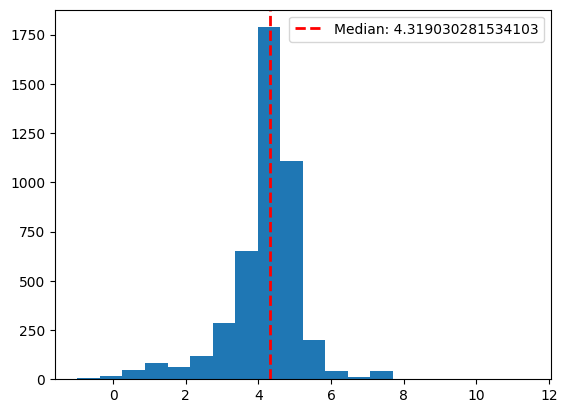

In [69]:
median = minimal_df["pIC50"].median()

plt.hist(minimal_df["pIC50"], bins = 20)
plt.axvline(x = median, color = 'red', linestyle = '--', linewidth = 2, label = f"Median: {median}")
plt.legend()

In [70]:
minimal_df_grouped = (
    minimal_df
    .groupby('canonical_Smiles')
    .agg(
        pIC50_mean=('pIC50', 'mean'),
        pIC50_median=('pIC50', 'median'),
        pIC50_var=('pIC50', 'var'),
        is_phenol=('is_phenol', 'first'),  # All duplicates are identical
        n_measurements=('pIC50', 'count')  # Track how many assays contributed
    )
    .reset_index()
)

# Import and transform df from datacuration
* get rid of metadata
* only keep smiles, pIC50
* generate activity column based on chosen threshold

In [ ]:
connected_df_grouped.head()

,canonical_Smiles,pIC50_mean,pIC50_median,pIC50_var,is_phenol
0,Brc1ccc(-c2csc(N/N=C/c3cc4ccccc4s3)n2)cc1,4.432974,4.432974,NaN,0
1,Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1,7.064241,7.064241,NaN,0
2,Brc1ccc(Cn2cc(COc3ccccc3)nn2)cc1,4.274358,4.274358,NaN,0
3,Brc1ccc2c(c1)Cc1c-2[nH]c2ccccc12,3.646630,3.646630,NaN,0
4,C(=N/Nc1nc(-c2ccccc2)cs1)\c1cccs1,4.040315,4.040315,NaN,0


In [ ]:
# Step 2: Drop rows with missing canonical_Smiles
df_process = connected_df_grouped.dropna(subset=["canonical_Smiles"])

# Step 3: Keep only canonical_Smiles and pIC50_median and is_phenol
df_process = df_process[["canonical_Smiles", "pIC50_median", "is_phenol"]].copy()

# Step 4: Rename pIC50_median to pIC50 for ML simplicity
df_process = df_process.rename(columns={"pIC50_median": "pIC50"})

# Step 5: Drop duplicates based on SMILES
df_process = df_process.drop_duplicates(subset="canonical_Smiles", keep="first")

#create is_phenolic
phenol = "cccccc[OH]"
df_process["is_phenol"] = df_process.apply(lambda x: is_substruct_in(mol_smiles=x["canonical_Smiles"], substruct_smarts=phenol), axis=1)

# Step 6: Ensure pIC50 is numeric
df_process["pIC50"] = pd.to_numeric(df_process["pIC50"], errors="coerce")


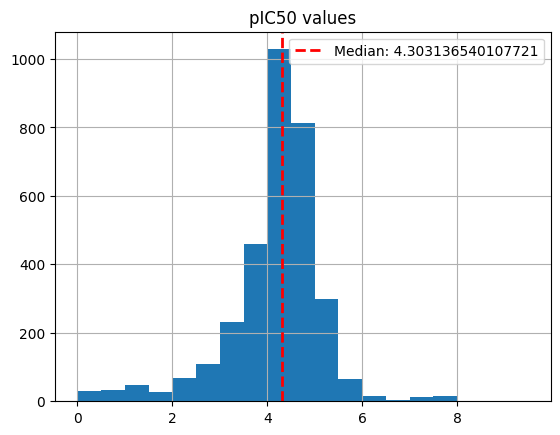

In [ ]:
#df["pIC50.1"]= pd.to_numeric(df["pIC50.1"], errors="coerce") #just switching back to numeric format which was removed after df.agg()
median = df_process["pIC50"].median()
binsize = 0.5
bins = np.arange(0, 10, binsize)       #most of the compounds (>4000) occure only once or twice --> excluded for better readability of histogram
plt.hist(df_process['pIC50'], bins=bins)
plt.axvline(x = median, color = 'red', linestyle = '--', linewidth = 2, label = f"Median: {median}")
plt.title("pIC50 values")
plt.legend()
plt.grid()
plt.show()

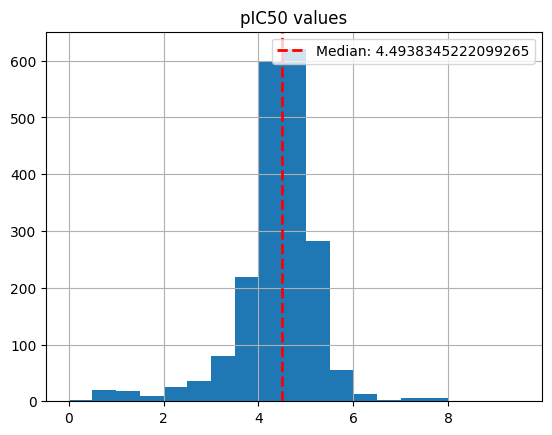

In [ ]:
df_is_phenol = df_process[df_process["is_phenol"] == 1]
median = df_is_phenol["pIC50"].median()
binsize = 0.5
bins = np.arange(0, 10, binsize)       #most of the compounds (>4000) occure only once or twice --> excluded for better readability of histogram
plt.hist(df_is_phenol["pIC50"], bins=bins)
plt.axvline(x = median, color = 'red', linestyle = '--', linewidth = 2, label = f"Median: {median}")
plt.title("pIC50 values")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import math
print(-math.log10(300000*10**(-9)))

3.5228787452803374


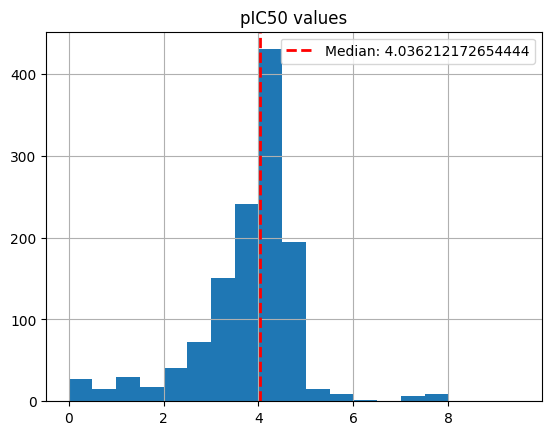

In [ ]:
df_is_not_phenol = df_process[df_process["is_phenol"] == 0]
median = df_is_not_phenol["pIC50"].median()
binsize = 0.5
bins = np.arange(0, 10, binsize)       #most of the compounds (>4000) occure only once or twice --> excluded for better readability of histogram
plt.hist(df_is_not_phenol["pIC50"], bins=bins)
plt.axvline(x = median, color = 'red', linestyle = '--', linewidth = 2, label = f"Median: {median}")
plt.title("pIC50 values")
plt.legend()
plt.grid()
plt.show()

In [73]:
#df = df.rename({"pIC50.1": "pIC50"}, axis=1)
activity_threshold = 4 #100 yM as in
print(f"Activity threshold: {activity_threshold}")

#predict activity 1 or 0
df_process['active'] = df_process['pIC50'].apply(lambda pic50: 0 if pic50 < activity_threshold else 1) #using the median as the

print(len(df_process[df_process["active"] == 1]))
print(df_process.head())

Activity threshold: 4
2251
                                 canonical_Smiles     pIC50  is_phenol  \
0       Brc1ccc(-c2csc(N/N=C/c3cc4ccccc4s3)n2)cc1  4.432974          0   
1  Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1  7.064241          0   
2                Brc1ccc(Cn2cc(COc3ccccc3)nn2)cc1  4.274358          0   
3                Brc1ccc2c(c1)Cc1c-2[nH]c2ccccc12  3.646630          0   
4               C(=N/Nc1nc(-c2ccccc2)cs1)\c1cccs1  4.040315          0   

                                                  fp  active  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...       1  


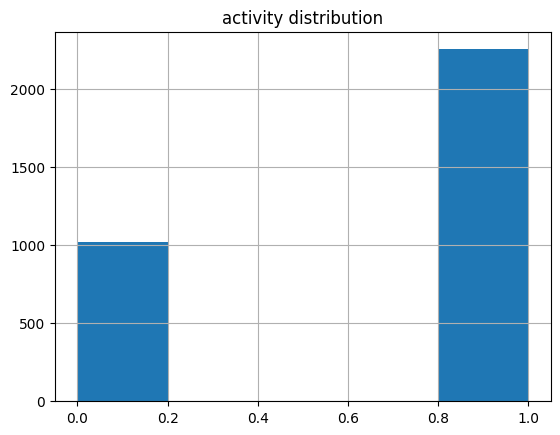

In [61]:
binsize = 0.2
bins = np.arange(0, 1.1, binsize)
plt.hist(df_process['active'], bins=bins)
plt.title("activity distribution")
plt.grid()
plt.show()

# Splits

In [75]:
#perform train test split on landrum curation (all compounds and only phenolic), minimal curation (all compounds and only phenolic)

Landrum = True
Phenol = True

if Landrum:
    df= df_process

    if Phenol and "is_phenol" in df_process.columns:
        df = df[df["is_phenol"] == 1].copy()

    X = df["canonical_Smiles"]  # keep as DataFrame
    y = df["active"]

else:

    df = minimal_df_grouped

    if Phenol and "is_phenol" in minimal_df_grouped.columns:
        df = df[df["is_phenol"] == 1].copy()

        X = df["canonical_Smiles"]
        y = df["active"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42)

# === Save the train and test sets (with headers) ===
prefix = []
prefix.append("Landrum" if Landrum else "Minimal")
prefix.append("Phenol" if Phenol else "All")
basename = "_".join(prefix)

X_train.to_csv(f"{basename}_X_train.csv", index=False, header=True)
y_train.to_csv(f"{basename}_y_train.csv", index=False, header=True)
X_test.to_csv(f"{basename}_X_test.csv", index=False, header=True)
y_test.to_csv(f"{basename}_y_test.csv", index=False, header=True)


# Generate features (move to other file)
* all from RDKit
* all from mordred
* and add all the the same dataframe

In [ ]:
# prompt: provide a code that generates some features available from rdkit for the structures given in df_curated



def generate_some_rdkit_features(smiles):
    """Generates RDKit features for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES

    features = {}
    # Descriptors
    features['MolWt'] = Descriptors.MolWt(mol)
    features['LogP'] = Descriptors.MolLogP(mol)
    features['TPSA'] = rdMolDescriptors.CalcTPSA(mol)
    # ... add other RDKit descriptors as needed ...
    # 2D Descriptors
    features['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
    features['NumHDonors'] = Descriptors.NumHDonors(mol)
    features['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)
    features['RingCount'] = Descriptors.RingCount(mol)

    # Topological Descriptors
    features['BalabanJ'] = Descriptors.BalabanJ(mol)
    features['BertzCT'] = Descriptors.BertzCT(mol)
    features['HallKierAlpha'] = Descriptors.HallKierAlpha(mol)


    # ... add other relevant features ...

    return features



In [ ]:
# prompt: provide a code that generates all features available from rdkit for the structures given in df_curated

def calculate_rdkit_descriptors_from_mol(smiles):
    """Generates RDKit features for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES

    features = Descriptors.CalcMolDescriptors(mol)

    return features

def generate_all_rdkit_features(df):
    """
    Calculates all RDKit features for molecules in a DataFrame and adds them as columns.

    Args:
        df: Input DataFrame with a 'canonical_Smiles' column.

    Returns:
        DataFrame with added RDKit features as individual columns.
    """

    # Apply the calculate_rdkit_descriptors_from_mol function to the 'canonical_Smiles' column
    df['features'] = df['canonical_Smiles'].apply(calculate_rdkit_descriptors_from_mol)

    # Expand the features dictionary into separate columns
    features_df = pd.DataFrame(df['features'].tolist(), index=df.index)  # Use index of original df

    # Concatenate the expanded features with the original DataFrame
    df = pd.concat([df, features_df], axis=1)

    # Drop the original features column
    df = df.drop('features', axis=1)

    return df

In [ ]:
#generate features for all smiles and for the test smiles
df_rdkit = generate_all_rdkit_features(df)

df_rdkit
number_of_features =  [len(df_rdkit.columns)]


In [ ]:
#generate features for train set to undergo feature selection
X_rdkit = generate_all_rdkit_features(X_train_all.to_frame())

In [ ]:
# prompt: provide a function to calculate all 2D descriptors from mordred using the smiles from the df dataframe and append the calculated features to the same dataframe



def generate_mordred_descriptors(df):
    """Calculates all 2D descriptors from Mordred and appends them to the DataFrame.

    Args:
        df: Input DataFrame with a 'canonical_Smiles' column.

    Returns:
        DataFrame with added Mordred descriptors.
    """

    calc = Calculator(descriptors, ignore_3D=True) # Initialize Mordred calculator (2D only)

    # Calculate descriptors for valid molecules
    def calculate_mordred_descriptors_for_mol(smiles):
      mol = Chem.MolFromSmiles(smiles)
      if mol is not None:
          return calc(mol)
      else:
          return None  # Return None for invalid SMILES

    df['mordred_descriptors'] = df['canonical_Smiles'].apply(calculate_mordred_descriptors_for_mol)

    # Expand the Mordred descriptor dictionary into separate columns
    mordred_df = pd.DataFrame(df['mordred_descriptors'].tolist())

    # Concatenate the expanded features with the original DataFrame
    df = pd.concat([df, mordred_df], axis=1)

    # Drop the original mordred_descriptors column
    df = df.drop('mordred_descriptors', axis=1)

    return df




In [ ]:
# Example usage (assuming 'df' is your DataFrame):
!pip install mordred


In [ ]:
#generate all mordred descriptors for all canonical smiles
!pip install numpy==1.23.5
from mordred import Calculator, descriptors

df_mordred = generate_mordred_descriptors(df)
df_mordred.head()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,Unnamed: 0,canonical_Smiles,pIC50,pIC50.1,pIC50.2,is_phenol,active,0,1,2,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
1,0.0,Brc1ccc(-c2csc(N/N=C/c3cc4ccccc4s3)n2)cc1,4.432974,4.432973633840939,NaN,0.0,1.0,23.787059,17.517403,0.0,...,10.550303,79.698065,442.079309,9.209986,1913.0,57.0,168.0,208.0,6.472222,6.166667
2,1.0,Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1,7.064241,7.064240896254688,NaN,0.0,1.0,16.372846,12.587225,0.0,...,9.624897,67.778024,343.032024,9.800915,1119.0,25.0,106.0,119.0,5.305556,4.666667
3,2.0,Brc1ccc(Cn2cc(COc3ccccc3)nn2)cc1,4.274358,4.274357844485582,NaN,0.0,1.0,14.049325,11.218120,0.0,...,10.031045,67.111146,282.999661,10.481469,471.0,28.0,100.0,124.0,4.027778,3.555556
4,3.0,Brc1ccc2c(c1)Cc1c-2[nH]c2ccccc12,3.646630,3.646630104753793,NaN,0.0,0.0,14.808802,12.178000,0.0,...,9.503234,67.062332,285.039439,9.501315,836.0,21.0,96.0,109.0,4.194444,4.277778
5,4.0,C(=N/Nc1nc(-c2ccccc2)cs1)\c1cccs1,4.040315,4.040314802086419,NaN,0.0,1.0,22.525367,16.010360,0.0,...,10.562431,79.038905,393.133340,7.862667,2086.0,42.0,160.0,195.0,5.451389,5.569444


In [ ]:

df_mordred.to_csv("all_mordred_unscaled.csv")



,Unnamed: 0,canonical_Smiles,pIC50,pIC50.1,pIC50.2,is_phenol,active,0,1,2,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(len(df_mordred.columns))





SyntaxError: incomplete input (<ipython-input-67-6ed19bc5e133>, line 4)

In [ ]:
#perform train_test_split with 0.8
from sklearn.model_selection import train_test_split
df_mordred.columns = df_mordred.columns.astype(str) #convert to string

y_all = df_mordred["active"]
X_all = df_mordred.drop(["pIC50", "active", "is_phenol", "canonical_Smiles"], axis=1)


canonical_Smiles_df = df_mordred["canonical_Smiles"]

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, train_size=0.8, random_state=42
)
print(len(X_train_all.columns))
print(X_train_all.dtypes.unique())

# Select columns that are NOT numeric (i.e., strings or objects)



1616
[dtype('float64') dtype('O')]


In [ ]:
#perform train_test_split with 0.8
from sklearn.model_selection import train_test_split
df_mordred_phenol = df_mordred[df_mordred["is_phenol"] == 1]
y_mordred_phenol = df_mordred_phenol["active"]
canonical_smiles_phenol = df_mordred_phenol["canonical_Smiles"]
X_mordred_phenol = df_mordred_phenol.drop(["Unnamed: 0", "pIC50", "active", "is_phenol", "canonical_Smiles"], axis=1)

X_train_phenol, X_test_phenol, y_train_phenol, y_test_phenol = train_test_split(
    X_mordred_phenol, y_mordred_phenol, train_size=0.8, random_state=42
)

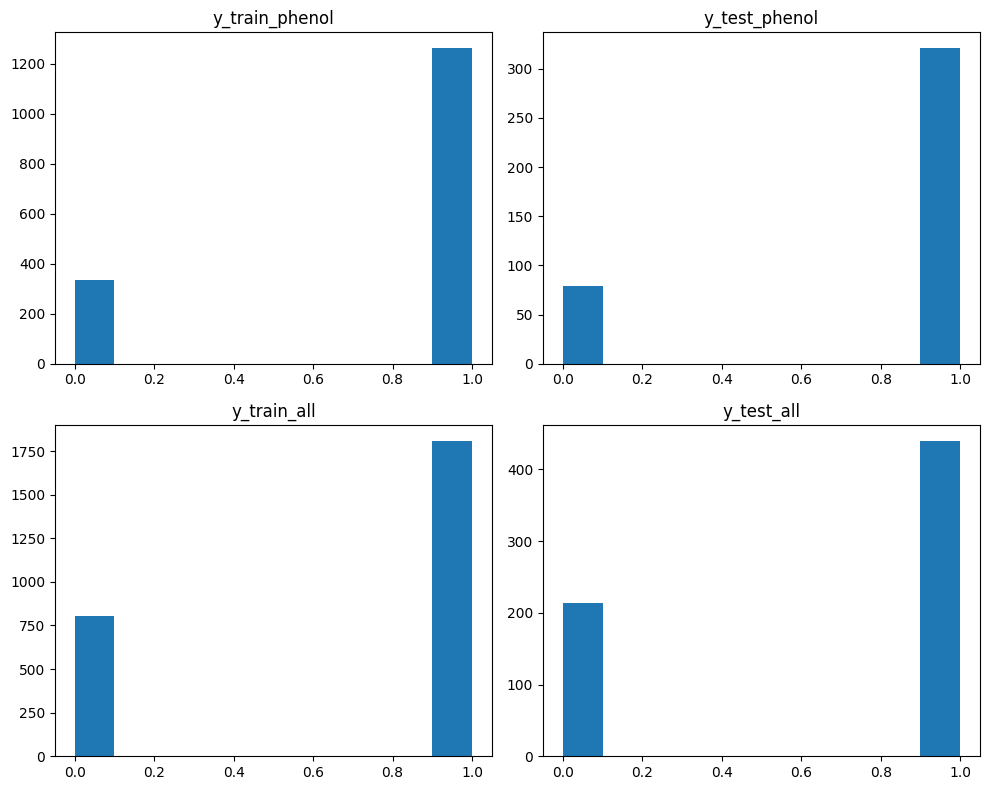

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(y_train_phenol)
axes[0, 0].set_title("y_train_phenol")

# Top-right
axes[0, 1].hist(y_test_phenol)
axes[0, 1].set_title("y_test_phenol")

# Bottom-left
axes[1, 0].hist(y_train_all)
axes[1, 0].set_title("y_train_all")

# Bottom-right
axes[1, 1].hist(y_test_all)
axes[1, 1].set_title("y_test_all")

plt.tight_layout()
plt.show()

In [ ]:
def download_numpy_to_csv(X, y, file_name):
  X = pd.DataFrame(X)
  X = drop_non_numeric_columns(X)
  X = remove_semi_constant_features(X, semi_constant_threshold=0.8)
  X = drop_high_correlation_columns(X, threshold=0.75)

  y = pd.Series(y, name="active")
  y.index = X.index
  df = pd.concat([X, y], axis=1)
  df.to_csv(file_name)
  try:
        from google.colab import files
        files.download(file_name)
  except ImportError:
        print(f"Saved locally as: {file_name}")
  return X
def reduce()


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler_all = StandardScaler()
X_scaler_phenol = StandardScaler()



X_train_mordred_scaled = X_scaler_all.fit_transform(X_train_all)
X_train_mordred_phenol_scaled = X_scaler_phenol.fit_transform(X_train_phenol)
X_test_mordred_scaled = X_scaler_all.fit_transform(X_test_all)
X_test_mordred_phenol_scaled = X_scaler_phenol.fit_transform(X_test_phenol)

test = download_numpy_to_csv(X_train_mordred_scaled, y_train_all, "train_mordred_scaled_reduced.csv")
download_numpy_to_csv(X_train_mordred_phenol_scaled, y_train_phenol, "train_mordred_phenol_scaled_reduced.csv")
download_numpy_to_csv(X_test_mordred_scaled, y_test_all, "test_mordred_scaled_reduced.csv")
download_numpy_to_csv(X_test_mordred_phenol_scaled, y_test_phenol, "test_mordred_phenol_scaled_reduced.csv")

download_numpy_to_csv(X_train_all, y_train_all, "train_mordred_unscaled_reduced.csv")
download_numpy_to_csv(X_train_phenol, y_train_phenol, "train_mordred_phenol_unscaled_reduced.csv")
download_numpy_to_csv(X_test_all, y_test_all, "test_mordred_unscaled_reduced.csv")
download_numpy_to_csv(X_test_phenol, y_test_phenol, "test_mordred_phenol_unscaled_reduced.csv")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unno

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,16,26,62,134,161,228,243,244,245,...,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576
1382,20.958632,12.0,0.0,1256.0,8.923077,24.153846,153.117241,87.000000,26.000000,39.000000,...,0.183333,0.087855,0.060928,0.049727,0.033148,0.021836,0.016694,0.013589,0.013520,0.007666
2804,8.025464,6.0,0.0,514.0,11.882353,30.235294,166.341778,-5.882353,-13.394464,-10.906574,...,0.272727,0.103704,0.066667,0.080494,0.029514,0.000000,0.000000,0.000000,0.000000,0.000000
782,25.691203,20.0,1.0,1370.0,7.193548,22.096774,161.014017,71.852237,48.365245,92.902185,...,0.166667,0.058957,0.047794,0.046184,0.022844,0.017168,0.010297,0.007216,0.007604,0.004124
2421,15.884519,12.0,1.0,870.0,7.368421,22.894737,159.858497,15.634349,-25.091413,-63.559557,...,0.204545,0.071429,0.020000,0.042469,0.025463,0.014649,0.010091,0.011428,0.007019,0.002058
1341,20.441795,12.0,0.0,1126.0,8.125000,23.458333,158.236431,43.671875,-29.343750,-45.467014,...,0.172414,0.095238,0.039773,0.038120,0.029190,0.021176,0.015380,0.013229,0.010156,0.007219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,28.573866,12.0,1.0,1568.0,5.176471,18.447059,162.255023,127.709481,102.201246,92.451765,...,0.269231,0.084848,0.058190,0.048211,0.032807,0.014783,0.019248,0.006990,0.008090,0.008929
1034,21.460493,16.0,3.0,1178.0,8.978723,25.063830,158.478581,37.409688,-25.724310,-79.265731,...,0.200000,0.072222,0.034375,0.047542,0.019213,0.018713,0.014156,0.007216,0.009643,0.005898
1512,22.276989,12.0,2.0,1298.0,8.407407,24.037037,158.665263,49.482853,-11.360768,-66.739369,...,0.209677,0.083333,0.036585,0.045490,0.022031,0.017434,0.012897,0.007874,0.008315,0.005630
449,16.470305,6.0,0.0,2130.0,4.712831,40.961538,159.791845,65.653846,46.762419,54.247506,...,0.152174,0.071429,0.041667,0.041587,0.025463,0.015265,0.009356,0.008768,0.007545,0.006671


In [ ]:
# make two dataframes X with features, Y with target ('active')
test["active"]

KeyError: 'active'

# Feature selection (move to other file)
* Remove semi-constant features (>= 80% of column values the same after Lu, A. (2022) https://doi.org/10.1038/s41598-022-11925-y)
* Remove highly correlating columns. Threshold to be discussed, maybe 0.75?


In [ ]:
# prompt: proviede code that drops columns from a dataframe if 80% or more of the values are the same

def remove_semi_constant_features(df, semi_constant_threshold):
    """Removes columns from a Pandas DataFrame where 80% or more of the values are the same.

    Args:
        df: The input DataFrame.

    Returns:
        A new DataFrame with the single-value columns removed.
    """

    cols_to_drop = []
    for col in df.columns:
        try:
            # Calculate the percentage of the most frequent value
            counts = df[col].value_counts(normalize=True)
            if counts.iloc[0] >= semi_constant_threshold:
                cols_to_drop.append(col)
        except (TypeError, IndexError):
            pass  # Handle cases where value_counts fails (e.g., mixed data types)

    return df.drop(columns=cols_to_drop)


In [ ]:
X = remove_semi_constant_features(X, semi_constant_threshold=0.8)
X

,pIC50,active,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,1602,1603,1604,1605,1606,1607,1608,1609,1610,1612
0,3.646630,0,3.537477,3.537477,1.035833,1.035833,0.489038,12.764706,284.156,274.076,...,7.742836,10.031045,67.111146,282.999661,10.481469,471,28,100.0,124.0,3.555556
1,4.502131,1,12.045946,12.045946,0.225616,-1.752086,0.126067,27.310345,416.335,396.175,...,0.000000,10.236418,64.355228,416.095476,8.491744,2478,48,146.0,170.0,6.388889
2,2.899629,0,10.794494,10.794494,0.067229,-0.404444,0.515484,15.000000,302.359,288.247,...,7.647309,9.832367,74.075943,302.083747,8.630964,1054,28,110.0,128.0,4.583333
3,2.869666,0,10.875061,10.875061,0.070531,-0.395976,0.465404,16.125000,344.440,324.280,...,6.580639,9.884967,71.723238,344.130697,7.821152,1555,33,122.0,140.0,5.333333
4,2.869666,0,10.812799,10.812799,0.060933,-0.408137,0.481019,11.727273,318.402,300.258,...,6.580639,9.696279,68.979122,318.115047,7.952876,1231,28,108.0,121.0,4.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,4.103474,0,5.995612,5.995612,0.356620,0.356620,0.767898,20.631579,251.329,234.193,...,0.000000,10.099671,53.097088,251.131014,6.975862,636,33,106.0,129.0,4.138889
1357,3.840734,0,2.451566,2.451566,0.867883,0.867883,0.204247,10.666667,468.644,436.388,...,0.000000,10.273705,72.157325,468.256549,6.886126,4322,51,184.0,210.0,8.055556
1358,3.493438,0,3.532222,3.532222,1.065000,1.065000,0.449856,12.750000,205.260,194.172,...,7.742836,9.963123,65.794818,205.089149,7.595894,391,26,94.0,117.0,3.388889
1359,4.280445,0,5.476705,5.476705,0.331136,0.331136,0.517514,14.736842,249.269,238.181,...,8.014666,10.203111,70.880402,249.078979,8.302633,639,32,116.0,146.0,3.916667


In [ ]:
# prompt: drop columns from df that do not contain numeric values

def drop_non_numeric_columns(df):
    """Drops columns from a DataFrame that do not contain numeric values.

    Args:
        df: The input DataFrame.

    Returns:
        A new DataFrame with non-numeric columns removed.
    """
    numeric_df = df.select_dtypes(include=np.number)
    return numeric_df


In [ ]:
X = drop_non_numeric_columns(X)
X

,pIC50,active,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,1602,1603,1604,1605,1606,1607,1608,1609,1610,1612
0,3.646630,0,3.537477,3.537477,1.035833,1.035833,0.489038,12.764706,284.156,274.076,...,7.742836,10.031045,67.111146,282.999661,10.481469,471,28,100.0,124.0,3.555556
1,4.502131,1,12.045946,12.045946,0.225616,-1.752086,0.126067,27.310345,416.335,396.175,...,0.000000,10.236418,64.355228,416.095476,8.491744,2478,48,146.0,170.0,6.388889
2,2.899629,0,10.794494,10.794494,0.067229,-0.404444,0.515484,15.000000,302.359,288.247,...,7.647309,9.832367,74.075943,302.083747,8.630964,1054,28,110.0,128.0,4.583333
3,2.869666,0,10.875061,10.875061,0.070531,-0.395976,0.465404,16.125000,344.440,324.280,...,6.580639,9.884967,71.723238,344.130697,7.821152,1555,33,122.0,140.0,5.333333
4,2.869666,0,10.812799,10.812799,0.060933,-0.408137,0.481019,11.727273,318.402,300.258,...,6.580639,9.696279,68.979122,318.115047,7.952876,1231,28,108.0,121.0,4.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,4.103474,0,5.995612,5.995612,0.356620,0.356620,0.767898,20.631579,251.329,234.193,...,0.000000,10.099671,53.097088,251.131014,6.975862,636,33,106.0,129.0,4.138889
1357,3.840734,0,2.451566,2.451566,0.867883,0.867883,0.204247,10.666667,468.644,436.388,...,0.000000,10.273705,72.157325,468.256549,6.886126,4322,51,184.0,210.0,8.055556
1358,3.493438,0,3.532222,3.532222,1.065000,1.065000,0.449856,12.750000,205.260,194.172,...,7.742836,9.963123,65.794818,205.089149,7.595894,391,26,94.0,117.0,3.388889
1359,4.280445,0,5.476705,5.476705,0.331136,0.331136,0.517514,14.736842,249.269,238.181,...,8.014666,10.203111,70.880402,249.078979,8.302633,639,32,116.0,146.0,3.916667


In [ ]:
# prompt: create a code that drops columns (one each) from df that correlate to each other more than 0.75

def drop_high_correlation_columns(df, threshold=0.75):
    """Drops columns from a DataFrame that have a correlation above a specified threshold.

    Args:
        df: The input DataFrame.
        threshold: The correlation threshold above which columns are dropped.

    Returns:
        A new DataFrame with highly correlated columns removed.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.75
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features
    return df.drop(columns=to_drop)

In [ ]:
# Assuming 'df' is your DataFrame
print(f"length before removing high correlation{len(X.columns)}")
X = drop_high_correlation_columns(X)
X
print(f"length after removing high correlation{len(X.columns)}")

,pIC50,active,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,...,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576
0,3.646630,0,3.537477,1.035833,1.035833,0.489038,12.764706,284.156,0.050320,-0.354276,...,0.150000,0.066667,0.058780,0.037884,0.034741,0.011956,0.017736,0.012346,0.015625,0.000000
1,4.502131,1,12.045946,0.225616,-1.752086,0.126067,27.310345,416.335,0.337998,-0.504144,...,0.250000,0.118863,0.050781,0.055789,0.030159,0.019773,0.018615,0.012679,0.010280,0.010666
2,2.899629,0,10.794494,0.067229,-0.404444,0.515484,15.000000,302.359,0.269602,-0.258309,...,0.195652,0.078544,0.041667,0.036759,0.027778,0.012796,0.015627,0.010413,0.006146,0.008264
3,2.869666,0,10.875061,0.070531,-0.395976,0.465404,16.125000,344.440,0.269602,-0.258309,...,0.173077,0.076190,0.035143,0.032701,0.028169,0.012485,0.012983,0.010303,0.005898,0.005789
4,2.869666,0,10.812799,0.060933,-0.408137,0.481019,11.727273,318.402,0.269602,-0.258309,...,0.239130,0.071685,0.043651,0.036934,0.025324,0.017925,0.017363,0.011289,0.010365,0.009633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,4.103474,0,5.995612,0.356620,0.356620,0.767898,20.631579,251.329,0.142527,-0.488892,...,0.090909,0.064516,0.039773,0.029732,0.016002,0.012551,0.007260,0.006450,0.000000,0.000000
1357,3.840734,0,2.451566,0.867883,0.867883,0.204247,10.666667,468.644,0.043275,-0.362872,...,0.125000,0.042735,0.024510,0.028889,0.016569,0.006327,0.005556,0.010204,0.004125,0.003920
1358,3.493438,0,3.532222,1.065000,1.065000,0.449856,12.750000,205.260,0.050318,-0.354276,...,0.105263,0.063492,0.056090,0.031813,0.027778,0.007811,0.006774,0.000000,0.000000,0.000000
1359,4.280445,0,5.476705,0.331136,0.331136,0.517514,14.736842,249.269,0.230801,-0.453584,...,0.130435,0.063492,0.051649,0.037667,0.023278,0.014815,0.012153,0.004789,0.002186,0.000000
